**Handwritten digit recognition using SVM**

In [ ]:
#import the necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix



In [ ]:
#import the needed file to the runtime
df= pd.read_csv("digit_svm.csv")

In [ ]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head() 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
  df.shape

(42000, 785)

**Data understanding and exploration**

In [ ]:
#checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
X=df.iloc[:,2:785].values
y=df.iloc[:,2].values

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

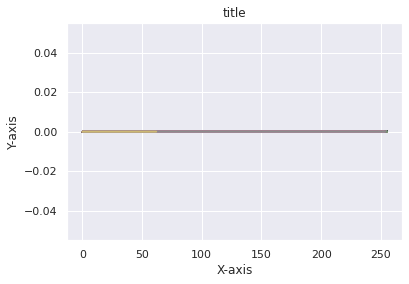

In [ ]:
plt.plot(X,y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("title")
plt.show()

In [ ]:
#you have drop the axis to 1 as below
X = df.drop("label", axis = 1)
y = df['label']

In [ ]:
#scaling the features
X_scaled = scale(X)

In [ ]:
#train testing split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,train_size=0.2,test_size=0.8,random_state=101)

In [ ]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**MODEL BUILDING**

In [ ]:
#linear model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predicting using linear model
pred_y=clf.predict(X_test)

In [ ]:
pred_y

array([1, 3, 0, ..., 2, 5, 4])

In [ ]:
y_test

20209    1
7136     3
17339    0
37117    0
22572    1
        ..
9513     3
1963     2
16438    2
14982    5
9731     4
Name: label, Length: 33600, dtype: int64

In [ ]:
#confusion matrix
confusion_matrix(y_test,pred_y)

array([[3188,    0,   10,    5,   11,   20,   32,    3,   15,    1],
       [   0, 3677,   14,   11,    5,    7,    4,    8,   30,    4],
       [  36,   29, 3027,   54,   55,   10,   30,   42,   48,   12],
       [  13,   12,  104, 3051,    9,  181,    5,   21,   54,   25],
       [   8,   14,   33,    2, 3057,    4,   25,   31,    6,  110],
       [  30,   23,   29,  136,   44, 2622,   44,   12,   72,   27],
       [  26,   11,   44,    4,   28,   33, 3113,    0,   18,    0],
       [   7,   24,   36,   19,   59,    9,    2, 3210,    4,  134],
       [  13,   46,   50,  120,   21,  110,   30,   18, 2843,   21],
       [  19,   17,   21,   22,  172,   20,    4,  161,   26, 2893]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#accuracy score
accuracy_score(y_test,pred_y)

0.913125

the linear model gives approximately 91.31% accuracy

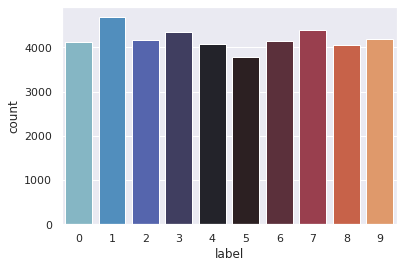

In [ ]:
sns.countplot(df['label'],palette='icefire')

In [ ]:
#non_linear model
#using rbf kernel
clf1=SVC(kernel='rbf')

#fit the model
clf1.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_y=clf1.predict(X_test)

In [ ]:
pred_y

array([1, 3, 0, ..., 2, 5, 4])

In [ ]:
y_test

20209    1
7136     3
17339    0
37117    0
22572    1
        ..
9513     3
1963     2
16438    2
14982    5
9731     4
Name: label, Length: 33600, dtype: int64

In [ ]:
accuracy_score(y_test,pred_y)

0.9396130952380952

In [ ]:
confusion_matrix(y_test,pred_y)

array([[3195,    0,   22,    6,    4,    9,   32,    4,   13,    0],
       [   0, 3690,   23,   13,    7,    2,    7,    6,    8,    4],
       [  15,   14, 3146,   31,   31,    5,   18,   37,   41,    5],
       [   3,    8,   96, 3192,    5,   72,    6,   30,   43,   20],
       [   3,    7,   57,    1, 3095,   10,   20,   24,    6,   67],
       [  15,    9,   40,   66,   15, 2780,   50,   15,   31,   18],
       [  18,    5,   48,    1,   11,   31, 3149,    2,   12,    0],
       [   6,   21,   72,   11,   23,    3,    0, 3284,    3,   81],
       [  13,   24,   42,   63,   14,   63,   22,   19, 2994,   18],
       [  12,   10,   42,   39,   80,    6,    0,   96,   24, 3046]])

we can clearly see that the non-linear rbf model gives approximately 94% accuracy

**VISUALIZATION OF FEW NUMBERS**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Text(0.5, 1.0, 'Digit 1')

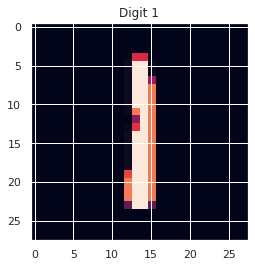

In [ ]:
one= df.iloc[2,1:]
one=one.values.reshape(28,28)
plt.imshow(one)
plt.title("Digit 1")

Text(0.5, 1.0, 'Digit 0')

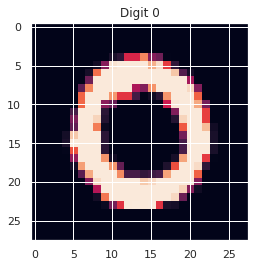

In [ ]:
zero= df.iloc[1,1:]
zero=zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Digit 0")

Text(0.5, 1.0, 'Digit 1')

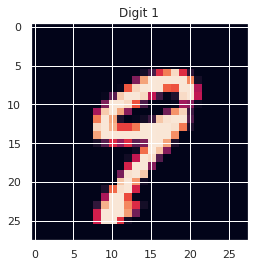

In [ ]:
nine= df.iloc[11,1:]
nine=nine.values.reshape(28,28)
plt.imshow(nine)
plt.title("Digit 1")